# Exploring Ford GoBike System Data (spring 2020)
## by Ahmed Tryaq

## Investigation Overview

I'm presenting the most important findings in the GoBike System data through spring of 2020:
- Proportion of users in each category.
- Proportion of bike types.
- Effect of user/bike categoty on trip duration.
- Change of total bike rides over time.


## Dataset Overview

This data set includes details about individual rides made in a bike-sharing system covering the greater San Francisco Bay area during the period from April to June (~spring 2020).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
dataframes = []
datasets = [4,5,6]

for data in datasets:
    dataframes.append(pd.read_csv('20200' + str(data) + '-baywheels-tripdata.csv'))

In [3]:
spring = pd.concat(dataframes)
spring.reset_index(inplace=True, drop=True)

spring['started_at'] = pd.to_datetime(spring['started_at'])
spring['ended_at'] = pd.to_datetime(spring['ended_at'])

In [4]:
spring['duration'] = spring['ended_at'] - spring['started_at']

index = (spring[spring.duration < '0']).index
spring.drop(index, inplace=True)


#Converting duration to minutes
spring['duration'] = spring.duration.dt.total_seconds() / 60

## Which type is the most?

The majority of customers are **casual** customers with 59.4%. While **members** represented only 40.6% of total trips.

In [5]:
gr_ob = spring.groupby('member_casual').count()
gr_ob['ratio'] = round(gr_ob['ride_id'] / gr_ob['ride_id'].sum() * 100,1)
gr_ob.reset_index(inplace=True)

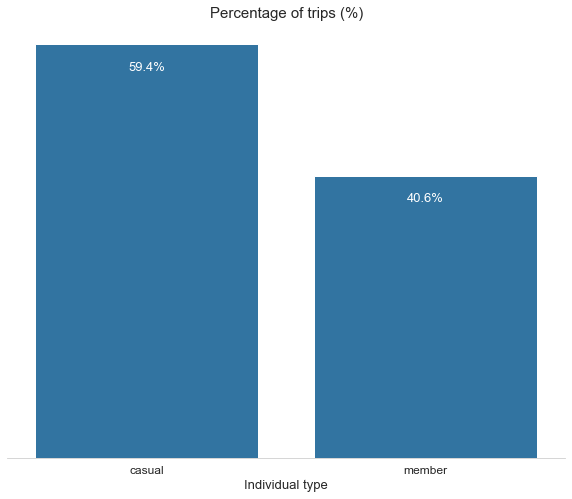

In [6]:
sb.set_style("whitegrid")
color = sb.color_palette()[0]
plt.figure(figsize=(10,8))
g = sb.countplot(spring['member_casual'], color=color)
for index, _ in gr_ob.iterrows():
    g.text(index, _.ride_id - 14000, str(_.ratio) + '%', color='white', ha="center", fontdict = {'fontsize' : 13})
sb.despine(top=True, left=True)
plt.ylabel('')
plt.xlabel('Individual type' , fontdict = {'fontsize' : 13})
plt.title('Percentage of trips (%)', fontdict = {'fontsize' : 15})
g.set_yticks([])
plt.xticks(fontsize = 12);

## What is the most favourite bike type?

It appears the most of trips done in spring 2020 was on an **electric bike** 68.7%. While **docked bikes** were used only in 31.3% of trips.

In [7]:
gr_ob = spring.groupby('rideable_type').count()
gr_ob['ratio'] = round(gr_ob['ride_id'] / gr_ob['ride_id'].sum() * 100,1)
gr_ob.reset_index(inplace=True)

In [8]:
gr_ob.sort_values('ride_id', inplace=True, ascending=False)

In [9]:
gr_ob.reset_index(inplace=True,drop=True)

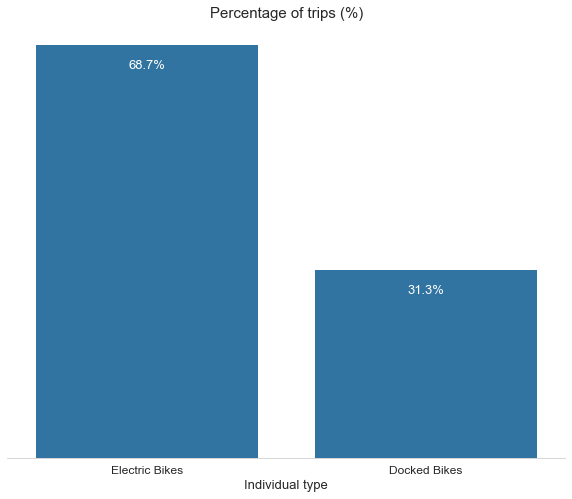

In [10]:
color = sb.color_palette()[0]
plt.figure(figsize=(10,8))
g = sb.countplot(data=spring, x='rideable_type', color=color)
for index, _ in gr_ob.iterrows():
    g.text(index, _.ride_id - 15000, str(_.ratio) + '%', color='white', ha="center", fontdict = {'fontsize' : 13})
plt.title('Percentage of trips (%)', fontdict = {'fontsize' : 15})
sb.despine(top=True, left=True)
plt.ylabel('')
plt.xlabel('Individual type', {'fontsize' : 13})
g.set_yticks([])
plt.xticks(ticks = [0,1], labels=['Electric Bikes','Docked Bikes'], fontsize=12);

## How customer type and bike type affect trip duration?

Visually, it looks that **casual customers** who used **docked bikes** have the heighst chances for having a very **long** trip or keeping the bike for a long period. While **members** who used **electric bikes** are related with the **least trip duration**.

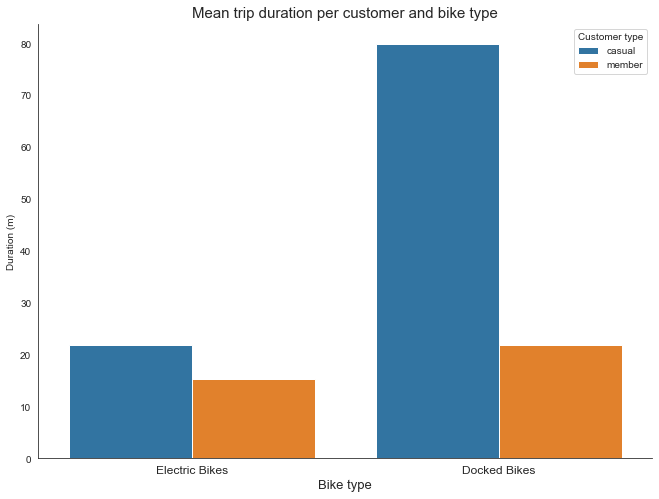

In [11]:
plt.figure(figsize=(11,8))
sb.set_style('white')
sb.barplot(data=spring, x='rideable_type', y='duration', hue='member_casual', ci=None);
plt.title('Mean trip duration per customer and bike type', fontdict = {'fontsize' : 15})
plt.ylabel('Duration (m)')
plt.xlabel('Bike type', {'fontsize' : 13})
plt.xticks(ticks = [0,1], labels=['Electric Bikes','Docked Bikes'], fontsize=12)
plt.legend(title='Customer type')
sb.despine(top=True);

## How does total rides count change over spring weeks?

We are going to have a look on change of total rides over time in each customer category.

Total rides count is increasing over time.


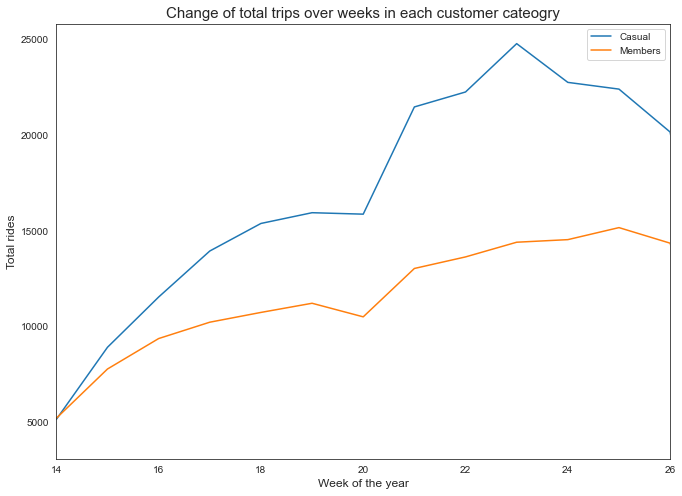

In [12]:
indexed_df = spring.set_index('started_at')

# Subsetting each category from the original dataframe
casuals = indexed_df[indexed_df.member_casual == 'casual']
members = indexed_df[indexed_df.member_casual == 'member']

#Summarizing dataframe in weeks
casuals_rids = casuals.resample('W').ride_id.count()
members_rids = members.resample('W').ride_id.count()

#plotting both lines
plt.figure(figsize=(11,8))
plt.plot(casuals_rids.index.weekofyear, casuals_rids, label='Casual')
plt.plot(members_rids.index.weekofyear, members_rids, label='Members')
plt.legend()
plt.xlim(14,26)
plt.xlabel('Week of the year', fontsize=12)
plt.ylabel('Total rides', fontsize=12)
plt.title('Change of total trips over weeks in each customer cateogry', fontdict = {'fontsize' : 15});
print('Total rides count is increasing over time.')

# Summary
- Most of customers were **casual customers**, and most of bikes rided were **electric bikes**. <br>
- **casual customers** who used **docked bikes** have the heighst chances for having a very **long** trip. While **members** who used **electric bikes** are related with the **least trip duration**.
- Number of trips each week increases over time.